In [1]:
## https://pypi.org/project/face-recognition/
## face-recognition 라이브러리 주석 풀고 설치
# !pip install face-recognition

In [1]:
import face_recognition as fr
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
# # 주석풀고 data 디렉터리를 만들고 이미지 3장을 다운받음
# !mkdir data
# %cd data
# !wget -O dami.jpg https://mn.kbs.co.kr/data/news/2018/07/25/4014554_7jN.jpg
# !wget -O many.jpg https://nkcf.org/wp-content/uploads/2017/11/people.jpg
# !wget -O ohmygirl.jpg https://v-phinf.pstatic.net/20200529_158/1590718251214YxgC7_JPEG/upload_720X535_VEC95B1EC8DB8EB84A4EC9DBC.jpg?type=f886_499
# %cd ../

/home/herbwood/Project/study_datascience/vision/data
--2020-08-14 11:39:07--  https://mn.kbs.co.kr/data/news/2018/07/25/4014554_7jN.jpg
Resolving mn.kbs.co.kr (mn.kbs.co.kr)... 99.86.144.91, 99.86.144.12, 99.86.144.32, ...
접속 mn.kbs.co.kr (mn.kbs.co.kr)|99.86.144.91|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 45605 (45K) [image/jpeg]
Saving to: ‘dami.jpg’

dami.jpg            100%[===================>]  44.54K  --.-KB/s    in 0.002s  

2020-08-14 11:39:07 (20.6 MB/s) - ‘dami.jpg’ saved [45605/45605]

--2020-08-14 11:39:07--  https://nkcf.org/wp-content/uploads/2017/11/people.jpg
Resolving nkcf.org (nkcf.org)... 104.18.34.67, 172.67.141.208, 104.18.35.67, ...
접속 nkcf.org (nkcf.org)|104.18.34.67|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘many.jpg’

many.jpg                [ <=>                ] 122.24K  --.-KB/s    in 0.05s   

2020-08-14 11:39:08 (2.21 MB/s) - ‘many.jpg’ saved [125175]

--2020-08-14 11

In [3]:
# 얼굴이 있는 부분의 좌표를 반환

def face_loc(image):
    image_fr = fr.load_image_file(image)
    face_locations = fr.face_locations(image_fr)
    
    return face_locations

In [4]:
# face detection 후 얼굴 영역을 사각형으로 표시한 이미지 반환

def draw_rectangle(image):
    # 얼굴이 검출된 좌표 
    face_locations = face_loc(image)
    image_copy = cv2.imread(image)
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    for fl in face_locations:
        # 반환하는 좌표는 왼쪽 위 모서리 x, y 좌표, 오른쪽 아래 모서리 x, y 좌표로 총 4개
        top, right, bottom, left = fl
        cv2.rectangle(image_copy, (left, top), (right, bottom), (0, 255, 0), 8)
    
    # 이미지 내 검출된 얼굴의 수 출력
    print(f"{len(face_locations)} people detected!")
    return image_copy

In [5]:
# 얼굴 영역 사각형으로으로 표시한 이미지 시각화

def plot_face_recognition(image):
    faces = draw_rectangle(image)
    faces = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
    plt.imshow(faces)
    plt.axis('off')
    plt.show()

1 people detected!


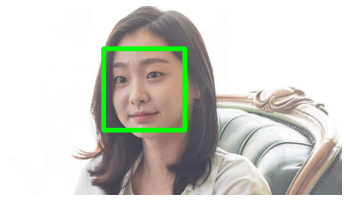



9 people detected!


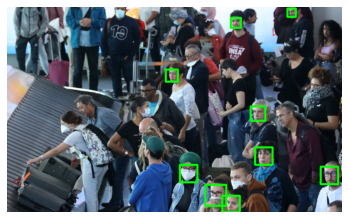



7 people detected!


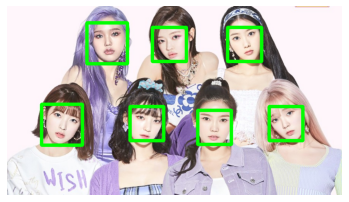



54 people detected!


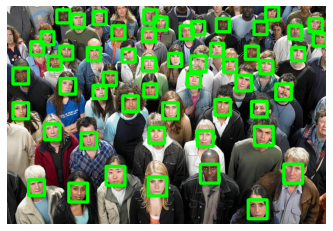

In [6]:
# 하나의 이미지 파일에 대해서만 face detection하고 싶을 땐
# plot_face_recogition('your_file')

# data 디렉터리에 있는 모든 이미지 파일에 대한 face detection 시각화
for file in os.listdir('data'):
    plot_face_recognition(os.path.join('data', file))
    print('\n')

In [8]:
# 얼굴 부분만 crop해서 저장, 시각화해줌

def crop_face(image_file, save=True, show=True):
    face_locations = face_loc(image_file)
    image = cv2.imread(image_file)
    for i, fl in enumerate(face_locations):
        top, right, bottom, left = fl
        
        # 얼굴이 검출된 좌표에 따라 crop시켜줌
        crop_img = image[top:bottom, left:right]
        cropped_face = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(cropped_face)
        plt.axis('off')
        
        # save 옵션을 True로 지정할 경우 crop된 얼굴 이미지를 현 디렉터리에 모두 저장
        if save:
            # 파일 이름을 원본 이미지에 번호를 붙이는 식으로..
            filename = os.path.splitext(os.path.basename(image_file))[0]
            plt.savefig(f'{filename}_{i+1}.jpg')
          
        # show 옵션을 True로 지정할 경우 crop된 이미지를 전부 시각화함
        # 마지막 이미지만 보여줌
        if show:
            plt.show()

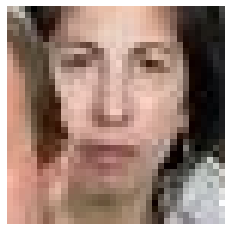

In [9]:
# data 디렉터리에 있는 이미지에 대해 face crop한 이미지를 저장

for file in os.listdir('data'):
    crop_face(os.path.join('data', file), save=True, show=False)

In [7]:
# 현재 디렉터리에 있는 jpg 파일을 모두 지웁니다
# 저장된 cropped face 이미지 지우기용
!find ./ -maxdepth 1 -name "*.jpg" -delete

# data 디렉터리 삭제 희망 시
!rm -rf data